# <b>Proyek Analisis Data: Bike Sharing Dataset</b>

- Nama: Hikmal Falah Agung Maulana
- Email: ikmalfalah@gmail.com
- ID dicoding: hikmal_falah

## <b>Pertanyaan Bisnis</b>

- Bagaimana musim dan cuaca dapat mempengaruhi penyewaan sepeda?
- Bagaimana tren permintaan penyewaan dari tahun ke tahun?
- Bagaimana penyewaan sepeda pada hari libur dibandingkan dengan hari kerja dari tahun ke tahun?
- Seberapa banyak penyewa yang memilih registered dibandingkan dengan casual?

## <b>Menyaipkan semua library yang dibutuhkan</b>

In [3697]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## <b>Data Wrangling</b>

### <b>Gathering Data</b>

Table day

In [3698]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Table hour

In [3699]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### <b>Assessing Data</b>

#### Menilai Data <span style="background-color: #eeefef; color: #000; width: max-content; padding: 0px 10px; border-radius: 5px;">day_df</span>

Memeriksa tipe data dari tiap kolom yang terdapat dalam day_df.

In [3700]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Jika diperhatikan terdapat kesalahan type data pada kolom <b><i>season</i></b>, <b><i>mnth</i></b>, <b><i>holiday</i></b>, <b><i>weekday</i></b>, <b><i>workingday</i></b>, dan <b><i>weathersit</i></b>. Kolom tersebut harusnya bisa direpresentasikan sebagai categorical.<br>
Selain itu, ada juga kesalahan type data pada kolom <b><i>dteday</i></b>. Pada kolom ini kita akan mengubah type data object menjadi datetime.<br><br>
Kita akan mengubahnya nanti di <b><i>Cleaning Data</i></b>.

Memeriksa missing value

In [3701]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Memeriksa duplikasi data

In [3702]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Ternyata setelah dicek tidak ada data yang duplikasi.<br>
Memeriksa parameter statistik dari kolom numerik yang terdapat dalam day_df.

In [3703]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [3704]:
hour_df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Menilai Data <span style="background-color: #eeefef; color: #000; width: max-content; padding: 0px 10px; border-radius: 5px;">hour_df</span>

Memeriksa tipe data dari tiap kolom yang terdapat dalam hour_df.

In [3705]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Jika diperhatikan terdapat kesalahan type data pada kolom <b><i>season</i></b>, <b><i>mnth</i></b>, <b><i>holiday</i></b>, <b><i>weekday</i></b>, <b><i>workingday</i></b>, dan <b><i>weathersit</i></b>. Kolom tersebut harusnya bisa direpresentasikan sebagai categorical.<br>
Selain itu, ada juga kesalahan type data pada kolom <b><i>dteday</i></b>. Pada kolom ini kita akan mengubah type data object menjadi datetime.<br><br>
Kita akan mengubahnya nanti di <b><i>Cleaning Data</i></b>.

Memeriksa missing value

In [3706]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Memeriksa duplikasi data

In [3707]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Ternyata setelah dicek tidak ada data yang duplikasi.<br>
Memeriksa parameter statistik dari kolom numerik yang terdapat dalam hour_df.

In [3708]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [3709]:
hour_df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Rangkuman Data

Oke, sampai tahap ini, kita telah berhasil mengidentifikasi berbagai masalah pada data yang telah kita kumpulkan. Berikut merupakan rangkumannya.<br>
|         | Type Data                                                                                                    | Missing Value | Duplicate Data | Inaccurate Value |
|---------|--------------------------------------------------------------------------------------------------------------|---------------|----------------|------------------|
| day_df  | Terdapat kesalahan type data untuk kolom dteday, season, mnth, holiday, weekday, workingday, dan weathersit. | -             | -              | -                |
| hour_df | Terdapat kesalahan type data untuk kolom dteday, season, mnth, holiday, weekday, workingday, dan weathersit. | -             | -              | -                |

### <b>Cleaning Data</b>

Pada tahap ini, kita akan membersihkan berbagai masalah yang telah teridentifikasi dalam proses assessing data.
- Menghapus kolom <b><i>workingday</i></b>, karena sudah ada kolom <b><i>weekday</i></b>.
- Mengubah type data pada kolom <b><i>season</i></b>, <b><i>mnth</i></b>, <b><i>holiday</i></b>, <b><i>weekday</i></b>, dan <b><i>weathersit</i></b> ke dalam categorical.
- Mengubah type data <b><i>dteday</i></b> menjadi datetime.
- Mengubah nama kolom agar lebih mudah dibaca.
- Mengubah isi kolom agar mudah dipahami.
- Membuat kolom baru bernama <b><i>category_day</i></b>.

#### Cleaning Data <span style="background-color: #eeefef; color: #000; width: max-content; padding: 0px 10px; border-radius: 5px;">day_df</span> & <span style="background-color: #eeefef; color: #000; width: max-content; padding: 0px 10px; border-radius: 5px;">hour_df</span>

Berdasarkan hasil proses assessing data yang telah kita lakukan, diketahui bahwa terdapat satu masalah yang sama yang dijumpai pada day_df dan hour_df, yaitu type data. Pada tahap ini, kita akan membersihkan masalah tersebut. Tetapi sebelum itu kita akan menghapus kolom yang tidak diperlukan seperti <b><i>workingday</i></b>.

In [3710]:
day_df.drop(['workingday'], axis=1, inplace=True)
hour_df.drop(['workingday'], axis=1, inplace=True)

##### 1. Mengubah type data

Mengubah type data pada kolom <b><i>season</i></b>, <b><i>mnth</i></b>, <b><i>holiday</i></b>, <b><i>weekday</i></b>, dan <b><i>weathersit</i></b> menjadi categorical.

In [3711]:
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']

for column in columns:
    day_df[column] = day_df[column].astype('category')
    hour_df[column] = hour_df[column].astype('category')

Mengubah type data pada kolom <b><i>dteday</i></b> menjadi datetime.

In [3712]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

Cek apakah data berhasil diubah

In [3713]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   weathersit  731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: category(5), datetime64[ns](1), float64(4), int64(5)
memory usage: 62.0

In [3714]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   weathersit  17379 non-null  category      
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: category(5), dateti

##### 2. Rename kolom

Mengubah nama kolom agar mudah dibaca

In [3715]:
day_df.rename(columns={
    'yr':'year',
    'mnth':'month',
    'weekday':'day',
    'weathersit':'weather',
    'temp':'temp(\u00B0C)',
    'atemp':'feels_like(\u00B0C)',
    'windspeed':'wind_speed',
    'cnt':'count_rental',
    'hum':'humidity'}, inplace=True)

hour_df.rename(columns={
    'yr':'year',
    'mnth':'month',
    'hr':'hour',
    'weekday':'day',
    'weathersit':'weather',
    'temp':'temp(\u00B0C)',
    'atemp':'feels_like(\u00B0C)',
    'windspeed':'wind_speed',
    'cnt':'count_rental',
    'hum':'humidity'}, inplace=True)

In [3716]:
day_df.head(5)

,instant,dteday,season,year,month,holiday,day,weather,temp(°C),feels_like(°C),humidity,wind_speed,casual,registered,count_rental
0,1,2011-01-01,1,0,1,0,6,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3717]:
hour_df.head(5)

,instant,dteday,season,year,month,hour,holiday,day,weather,temp(°C),feels_like(°C),humidity,wind_speed,casual,registered,count_rental
0,1,2011-01-01,1,0,1,0,0,6,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,1,0.24,0.2879,0.75,0.0,0,1,1


Seperti yang kita lihat di atas, isi dari kolom <b><i>season</i></b>, <b><i>month</i></b>, <b><i>holiday</i></b>, <b><i>day</i></b>, dan <b><i>weather</i></b> masih berupa angka, ini sangat sulit untuk dibaca. Oleh karena itu kita akan merubah isi dari kolom tersebut agar lebih mudah dibaca.

##### 3. Mengubah isi kolom

Berdasarkan file Readme.txt yang ada pada dokumentasi [<i>bike sharing dataset</i>](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset). Kita dapat mengetahui bahwa:
- season (1:springer, 2:summer, 3:fall, 4:winter)
- year (0: 2011, 1:2012)
- month ( 1 to 12)
- hour (0 to 23)
- weathersit:
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)

Season

In [3718]:
day_df = day_df.replace({'season': {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}})
hour_df = hour_df.replace({'season': {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}})

C:\Users\ikmal\AppData\Local\Temp\ipykernel_5172\1251409660.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df = day_df.replace({'season': {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}})
C:\Users\ikmal\AppData\Local\Temp\ipykernel_5172\1251409660.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hour_df = hour_df.replace({'season': {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}})


Year

In [3719]:
day_df = day_df.replace({'year': {0: 2011, 1: 2012}})
hour_df = hour_df.replace({'year': {0: 2011, 1: 2012}})

Month

In [3720]:
day_df = day_df.replace({'month': {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}})
hour_df = hour_df.replace({'month': {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}})

C:\Users\ikmal\AppData\Local\Temp\ipykernel_5172\453684059.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df = day_df.replace({'month': {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}})
C:\Users\ikmal\AppData\Local\Temp\ipykernel_5172\453684059.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hour_df = hour_df.replace({'month': {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}})


Day

In [3721]:
day_df = day_df.replace({'day': {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}})
hour_df = hour_df.replace({'day': {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}})

C:\Users\ikmal\AppData\Local\Temp\ipykernel_5172\2081684645.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df = day_df.replace({'day': {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}})
C:\Users\ikmal\AppData\Local\Temp\ipykernel_5172\2081684645.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hour_df = hour_df.replace({'day': {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}})


Weather

In [3722]:
day_df = day_df.replace({'weather': {1: 'Clear', 2: 'Misty', 3: 'Light_Rain', 4: 'Heavy_Rain'}})
hour_df = hour_df.replace({'weather': {1: 'Clear', 2: 'Misty', 3: 'Light_Rain', 4: 'Heavy_Rain'}})

C:\Users\ikmal\AppData\Local\Temp\ipykernel_5172\2007744176.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df = day_df.replace({'weather': {1: 'Clear', 2: 'Misty', 3: 'Light_Rain', 4: 'Heavy_Rain'}})
C:\Users\ikmal\AppData\Local\Temp\ipykernel_5172\2007744176.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hour_df = hour_df.replace({'weather': {1: 'Clear', 2: 'Misty', 3: 'Light_Rain', 4: 'Heavy_Rain'}})


Temp dan feels_like dalam celcius

In [3723]:
day_df['temp(\u00B0C)'] = day_df['temp(\u00B0C)'] * 41
hour_df['temp(\u00B0C)'] = hour_df['temp(\u00B0C)'] * 41

day_df['feels_like(\u00B0C)'] = day_df['feels_like(\u00B0C)'] * 50
hour_df['feels_like(\u00B0C)'] = hour_df['feels_like(\u00B0C)'] * 50

# Membulatkan nilai menjadi 2 angka desimal
day_df['temp(\u00B0C)'] = day_df['temp(\u00B0C)'].round(2)
hour_df['temp(\u00B0C)'] = hour_df['temp(\u00B0C)'].round(2)

day_df['feels_like(\u00B0C)'] = day_df['feels_like(\u00B0C)'].round(2)
hour_df['feels_like(\u00B0C)'] = hour_df['feels_like(\u00B0C)'].round(2)

Menghitung humidity

In [3724]:
day_df['humidity'] = day_df['humidity'] * 100
hour_df['humidity'] = hour_df['humidity'] * 100

# Membulatkan nilai menjadi 2 angka desimal
day_df['humidity'] = day_df['humidity'].round(2)
hour_df['humidity'] = hour_df['humidity'].round(2)

In [3725]:
day_df.head(5)

,instant,dteday,season,year,month,holiday,day,weather,temp(°C),feels_like(°C),humidity,wind_speed,casual,registered,count_rental
0,1,2011-01-01,Spring,2011,Jan,0,Saturday,Misty,14.11,18.18,80.58,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sunday,Misty,14.90,17.69,69.61,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Monday,Clear,8.05,9.47,43.73,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tuesday,Clear,8.20,10.61,59.04,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wednesday,Clear,9.31,11.46,43.70,0.186900,82,1518,1600


In [3726]:
hour_df.head(5)

,instant,dteday,season,year,month,hour,holiday,day,weather,temp(°C),feels_like(°C),humidity,wind_speed,casual,registered,count_rental
0,1,2011-01-01,Spring,2011,Jan,0,0,Saturday,Clear,9.84,14.40,81.0,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,Saturday,Clear,9.02,13.64,80.0,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,Saturday,Clear,9.02,13.64,80.0,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,Saturday,Clear,9.84,14.40,75.0,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,Saturday,Clear,9.84,14.40,75.0,0.0,0,1,1


##### 4. Membuat kolom <span style="background-color: #eeefef; color: #000; width: max-content; padding: 0px 10px; border-radius: 5px;">category_days</span>

In [3727]:
day = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
def get_category_days(day):
    if day in ["Saturday", "Sunday"]:
        return "Weekend"
    else: 
        return "Weekday"

day_df["category_day"] = day_df["day"].apply(get_category_days)
hour_df["category_day"] = hour_df["day"].apply(get_category_days)

## <b>Exploratory Data Analysis (EDA)</b>

#### Explore <span style="background-color: #eeefef; color: #000; width: max-content; padding: 0px 10px; border-radius: 5px;">day_df</span>

Sebagai permulaan, kita akan melihat rangkuman parameter statistik dari data day_df menggunakan method describe().

In [3728]:
day_df.describe(include='all')

,instant,dteday,season,year,month,holiday,day,weather,temp(°C),feels_like(°C),humidity,wind_speed,casual,registered,count_rental,category_day
count,731.000000,731,731,731.000000,731,731.0,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,NaN,NaN,4,NaN,12,2.0,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Fall,NaN,Jan,0.0,Sunday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weekday
freq,NaN,NaN,188,NaN,62,710.0,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,NaN,NaN,NaN,NaN,20.310821,23.717784,62.789357,0.190486,848.176471,3656.172367,4504.348837,NaN
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,2.420000,3.950000,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,13.820000,16.895000,52.000000,0.134950,315.500000,2497.000000,3152.000000,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,20.430000,24.340000,62.670000,0.180975,713.000000,3662.000000,4548.000000,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,26.875000,30.430000,73.020000,0.233214,1096.000000,4776.500000,5956.000000,NaN
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,35.330000,42.040000,97.250000,0.507463,3410.000000,6946.000000,8714.000000,NaN


Berdasarkan rangkuman parameter statistik di atas, kita memperoleh informasi jumlah pelanggan sebanyak <b>731 orang</b>. 

<b>Jumlah penyewa berdasarkan season</b>

In [3729]:
day_df.groupby(by='season').count_rental.sum().sort_values(ascending=False)

C:\Users\ikmal\AppData\Local\Temp\ipykernel_5172\1249861467.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').count_rental.sum().sort_values(ascending=False)


season
Fall      1061129
Summer     918589
Winter     841613
Spring     471348
Name: count_rental, dtype: int64

Berdasarkan hasil di atas, penyewaan paling banyak terjadi pada musim <b>Fall</b> (musim gugur).

<b>Jumlah penyewa berdasarkan cuaca</b>

In [3730]:
day_df.groupby(by='weather').count_rental.sum().sort_values(ascending=False)

C:\Users\ikmal\AppData\Local\Temp\ipykernel_5172\2108629310.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weather').count_rental.sum().sort_values(ascending=False)


weather
Clear         2257952
Misty          996858
Light_Rain      37869
Name: count_rental, dtype: int64

Berdasarkan hasil di atas, penyewaan paling banyak terjadi dicuaca yang <b>Clear</b> atau cerah.

<b>Jumlah penyewa tiap tahun berdasarkan weekend dan weekday</b>

In [3731]:
day_df.groupby(by=['category_day', 'year']).agg({
    'count_rental': ['sum'],
}).unstack('year')

count_rental         
                      sum         
year                 2011     2012
category_day                      
Weekday            886286  1484559
Weekend            356817   565017

Berdasarkan hasil di atas kita dapat mengetahui bahwa penyewaan sepeda paling banyak pada <b>Weekday</b> di <b>tahun 2012</b>.

<b>Jumlah penyewaan tiap tahun berdasarkan registered dan casul</b>

In [3732]:
day_df.groupby(by='year').agg({
    'registered': ['sum'],
    'casual': ['sum'],
})

,registered,casual
,sum,sum
year,,
2011,995851,247252
2012,1676811,372765


Berdasarkan hasil di atas, kita dapat mengetahui bahwa orang yang sudah registered jauh mendominasi dari pada yang casual. Hal ini dibuktikan dengan adanya peningkatan yang <b>signifikan</b> dari tahun <b>2011</b> sampai <b>2012</b>.

#### Explore <span style="background-color: #eeefef; color: #000; width: max-content; padding: 0px 10px; border-radius: 5px;">hour_df</span>

Kita akan melihat rangkuman parameter statistik dari data hour_df menggunakan method describe().

In [3733]:
hour_df.describe(include='all')

,instant,dteday,season,year,month,hour,holiday,day,weather,temp(°C),feels_like(°C),humidity,wind_speed,casual,registered,count_rental,category_day
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379.0,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,NaN,4,NaN,12,NaN,2.0,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Fall,NaN,Jul,NaN,0.0,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weekday
freq,NaN,NaN,4496,NaN,1488,NaN,16879.0,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,NaN,NaN,NaN,20.376474,23.788484,62.722884,0.190098,35.676218,153.786869,189.463088,NaN
min,1.0000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,NaN,NaN,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,NaN,NaN,NaN,13.940000,16.660000,48.000000,0.104500,4.000000,34.000000,40.000000,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,NaN,NaN,NaN,20.500000,24.240000,63.000000,0.194000,17.000000,115.000000,142.000000,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,NaN,NaN,NaN,27.060000,31.060000,78.000000,0.253700,48.000000,220.000000,281.000000,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,NaN,NaN,NaN,41.000000,50.000000,100.000000,0.850700,367.000000,886.000000,977.000000,NaN


Berdasarkan rangkuman data di atas, kita dapat mengetahui jumlah penyewa sebanyak <b>17379</b> dan memiliki rata - rata penyewaan pada jam <b>11.54</b>.

<b>Jumlah penyewa berdasarkan jam</b>

In [3734]:
hour_df.groupby(by='hour').agg({
    'count_rental': ['sum'],
}).sort_values(by=('count_rental', 'sum'), ascending=False)

,count_rental
,sum
hour,
17,336860
18,309772
8,261001
16,227748
19,226789
13,184919
12,184414
15,183149


Berdasarkan data di atas, kita dapat mengetahui bahwa penyewa paling banyak terjadi pada jam <b>17.00</b>, sedangkan yang paling sedikit pada jam <b>04.00</b>.

## <b>Virtualization & Explanatory Analysis</b>

#### Pertanyaan 1: <b>Bagaimana musim dan cuaca dapat mempengaruhi penyewaan sepeda?</b>

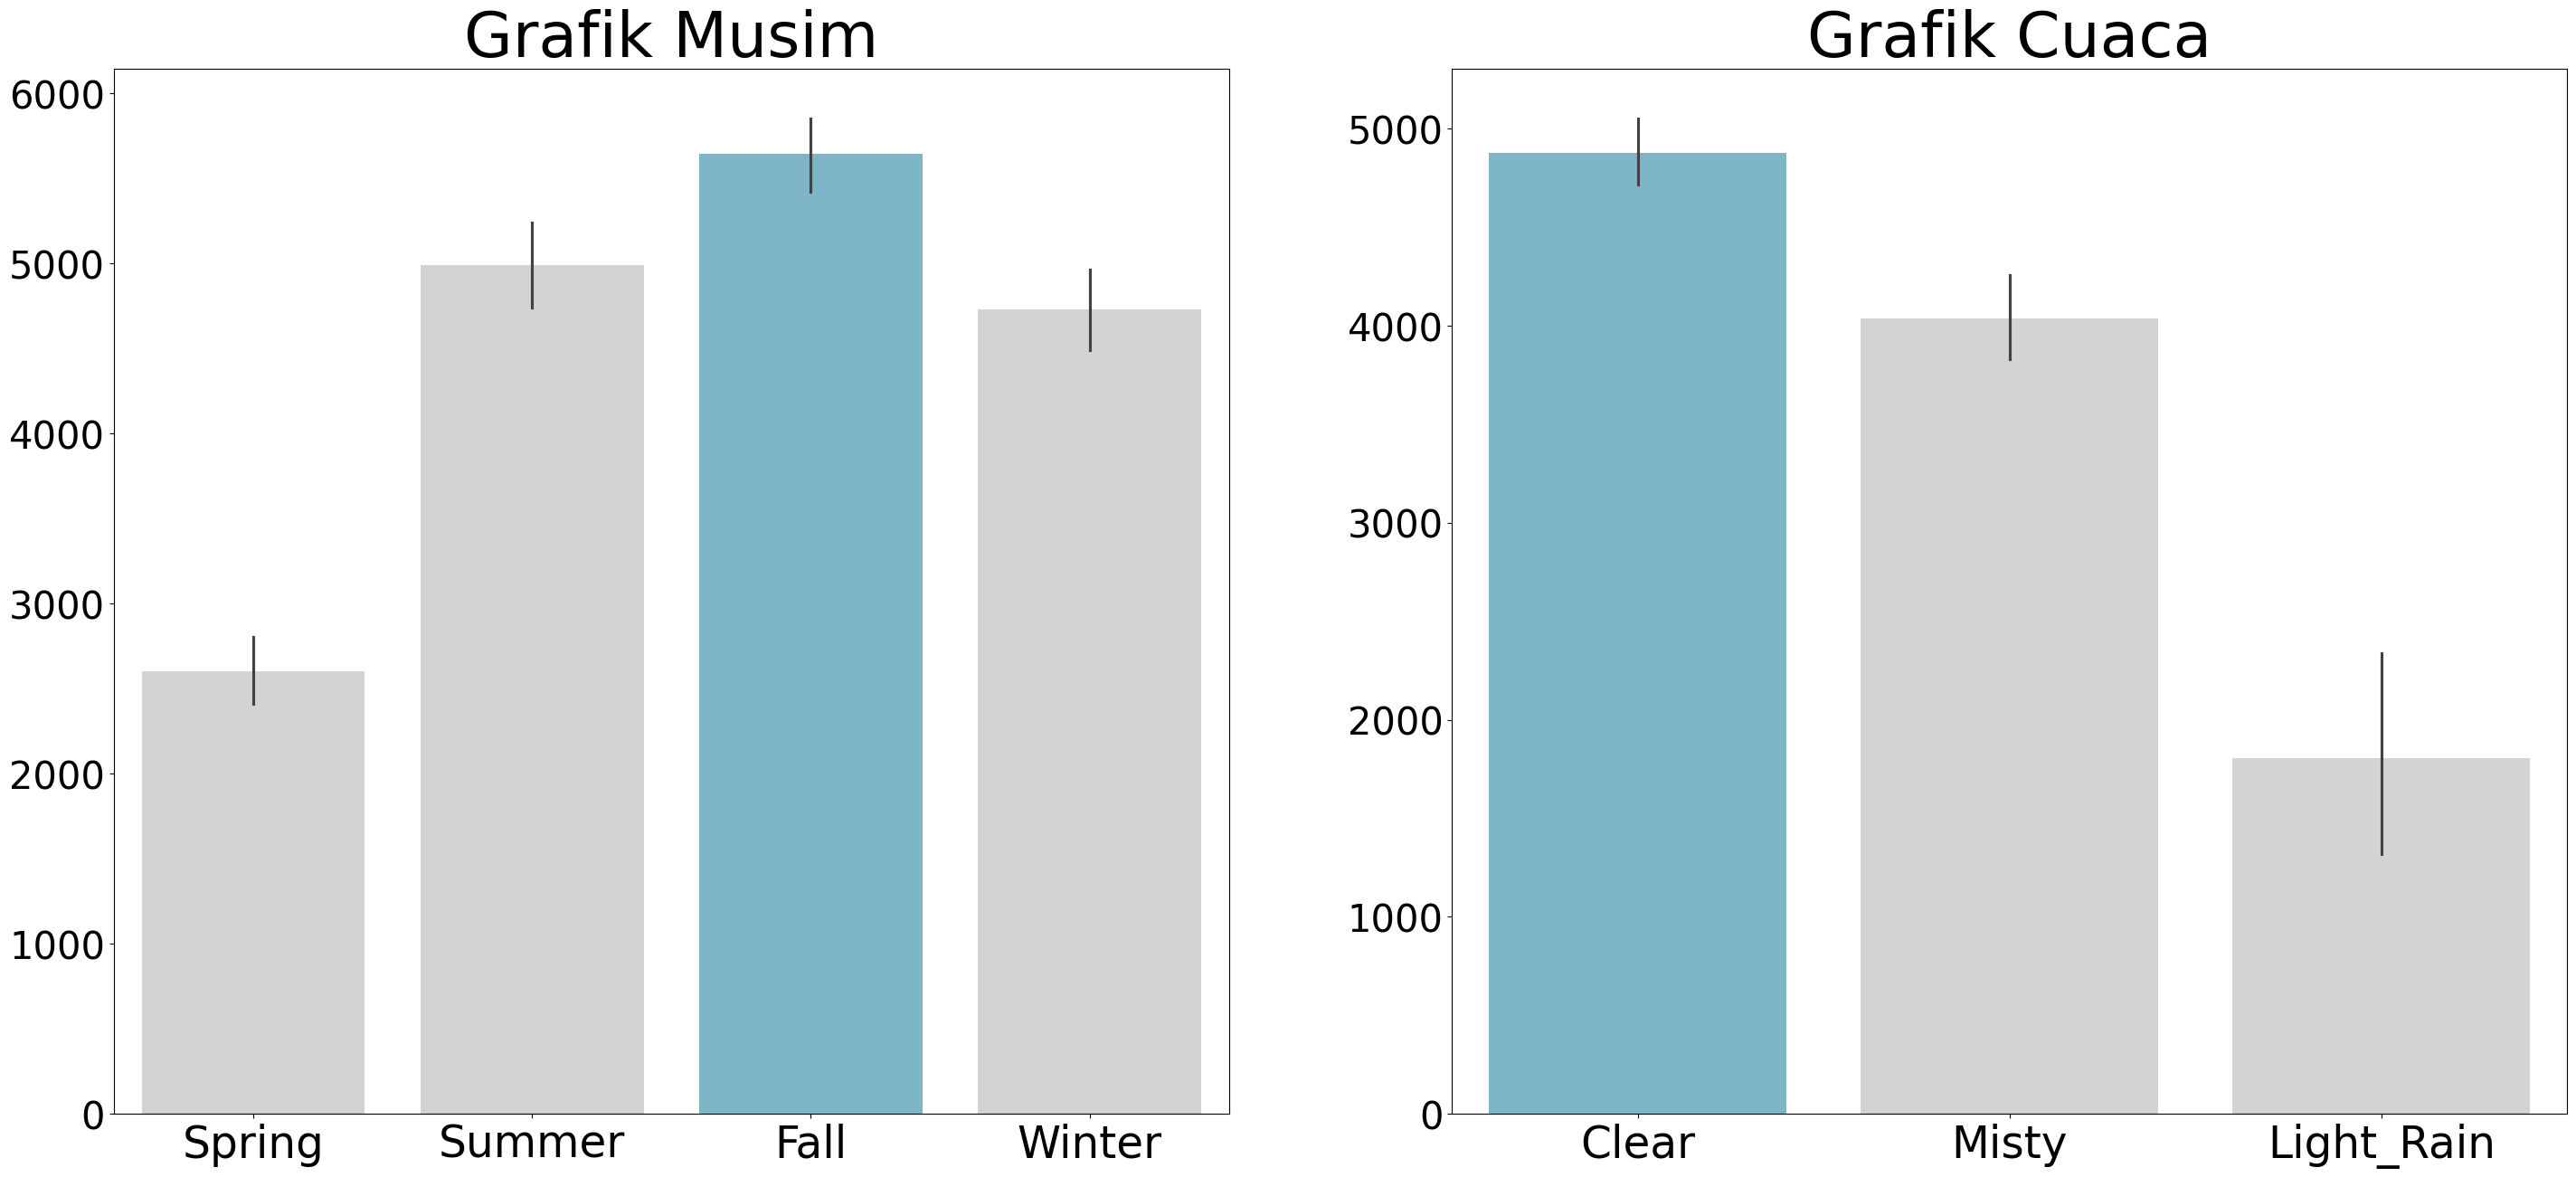

In [3735]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))

# Season
color_1 = ['#D3D3D3', '#D3D3D3', '#72BCD4', '#D3D3D3']

sns.barplot(
        y='count_rental', 
        x='season',
        data=day_df.sort_values(by='season', ascending=False),
        palette=color_1,
        ax=ax[0],
        hue='season',
        legend=False
    )

# mengatur judul, label y dan x, serta tick params
ax[0].set_title('Grafik Musim', loc='center', fontsize=50)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].tick_params(axis='x', labelsize=35)
ax[0].tick_params(axis='y', labelsize=30)


# Weather
color_2 = ['#72BCD4', '#D3D3D3', '#D3D3D3']

sns.barplot(
        y='count_rental', 
        x='weather',
        data=day_df.sort_values(by='weather', ascending=False),
        palette=color_2,
        ax=ax[1],
        hue='weather',
        legend=False
    )

# mengatur judul, label y dan x, serta tick params
ax[1].set_title('Grafik Cuaca', loc='center', fontsize=50)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].tick_params(axis='x', labelsize=35)
ax[1].tick_params(axis='y', labelsize=30)

# menampilkan plot
plt.show()

Berdasarkan gambar di atas, kita dapat mengetahui bahwa penyewaan paling banyak terjadi pada musim <b>Fall</b> (musim gugur) dan dicuaca yang <b>Clear</b> atau cerah.

#### Pertanyaan 2: <b>Bagaimana tren permintaan penyewaan dari tahun ke tahun?</b>

C:\Users\ikmal\AppData\Local\Temp\ipykernel_5172\3143390604.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_data = day_df.groupby(by=['year', 'month']).agg({


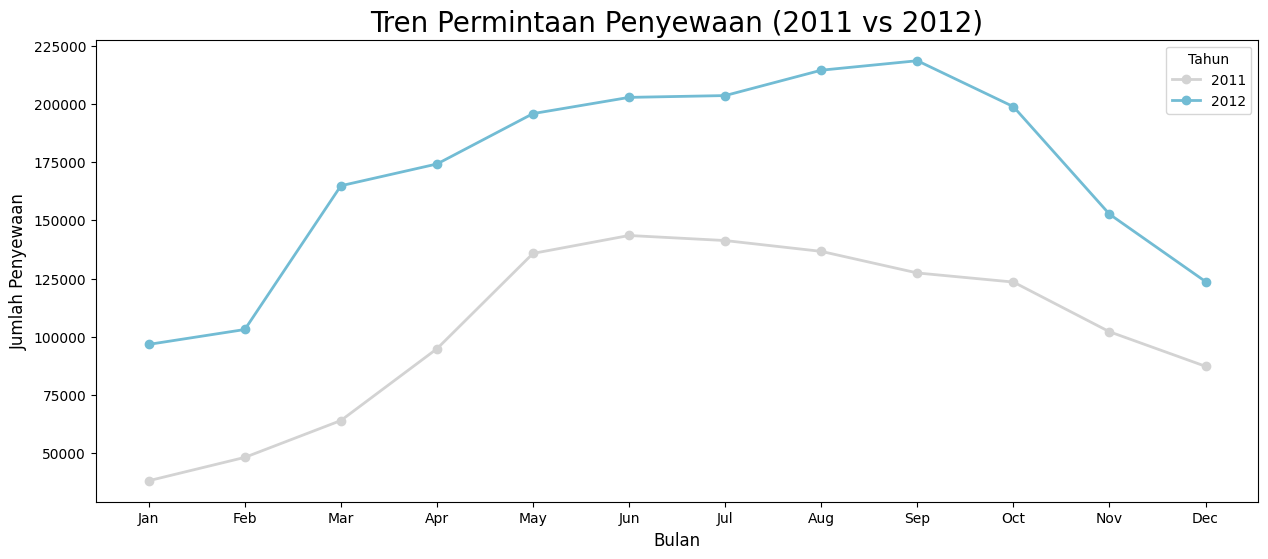

In [3736]:
# Mengelompokkan data berdasarkan bulan dan tahun, lalu menjumlahkan count_rental
monthly_data = day_df.groupby(by=['year', 'month']).agg({
    'count_rental': 'sum'
}).reset_index()

# Memisahkan data untuk masing-masing tahun
data_2011 = monthly_data[monthly_data['year'] == 2011]
data_2012 = monthly_data[monthly_data['year'] == 2012]

plt.figure(figsize=(15, 6))

# Line chart untuk tahun 2011
plt.plot(
    data_2011['month'],
    data_2011['count_rental'],
    marker='o', 
    linewidth=2,
    color='#D3D3D3',
    label='2011'
)

# Line chart untuk tahun 2012
plt.plot(
    data_2012['month'],
    data_2012['count_rental'],
    marker='o', 
    linewidth=2,
    color='#72BCD4',
    label='2012'
)

# Menambahkan judul dan label
plt.title('Tren Permintaan Penyewaan (2011 vs 2012)', loc='center', fontsize=20)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Penyewaan', fontsize=12)

# Menambahkan legenda untuk membedakan tahun
plt.legend(title='Tahun')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


Pada gambar di atas peningkatan penyewaan paling banyak pada <b>tahun 2012</b> di bulan <b>September</b>.<br>
<b>Tahun 2012</b><br>
Bisa dilihat bahwa peningkatan signifikan terlihat pada bulan-bulan awal <b>tahun 2012</b>, dengan lonjakan besar dari bulan <b>Februari</b> hingga <b>April</b>. Setelah itu, jumlah penyewaan stabil hingga <b>Agustus</b>, sebelum menurun secara bertahap mulai dari <b>September</b> hingga <b>Desember</b>.<br><br>
<b>Tahun 2011</b><br>
Di <b>tahun 2011</b>, jumlah penyewaan meningkat tajam pada bulan <b>Maret</b>, tetapi setelah itu mengalami sedikit peningkatan yang bertahap dari <b>Maret</b> hingga <b>Mei</b>.
Setelah bulan <b>Mei</b>, tren penyewaan untuk <b>tahun 2011</b> relatif stabil hingga <b>Desember</b> dengan hanya sedikit penurunan.

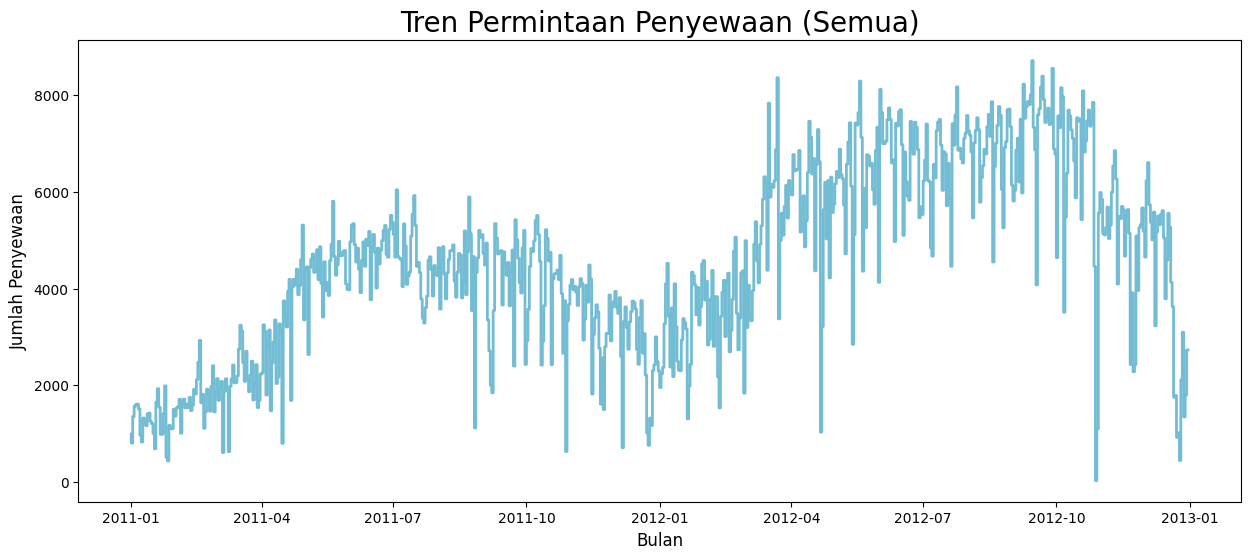

In [3737]:
# Mengelompokkan data berdasarkan dteday, lalu menjumlahkan count_rental
monthly_data = day_df.groupby(by=['dteday']).agg({
    'count_rental': 'sum'
}).reset_index()

# Mengatur ukuran frame grafik
plt.figure(figsize=(15, 6))

plt.step(
    monthly_data['dteday'],
    monthly_data['count_rental'],
    linewidth=2,
    color='#72BCD4'
)

# Menambahkan judul dan label
plt.title('Tren Permintaan Penyewaan (Semua)', loc='center', fontsize=20)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Penyewaan', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


Pada gambar di atas, kita bisa melihat bahwa jumlah penyewaan naik dari tahun ke tahun.

#### Pertanyaan 3: <b>Bagaimana penyewaan sepeda pada hari libur dibandingkan dengan hari kerja dari tahun ke tahun?</b>

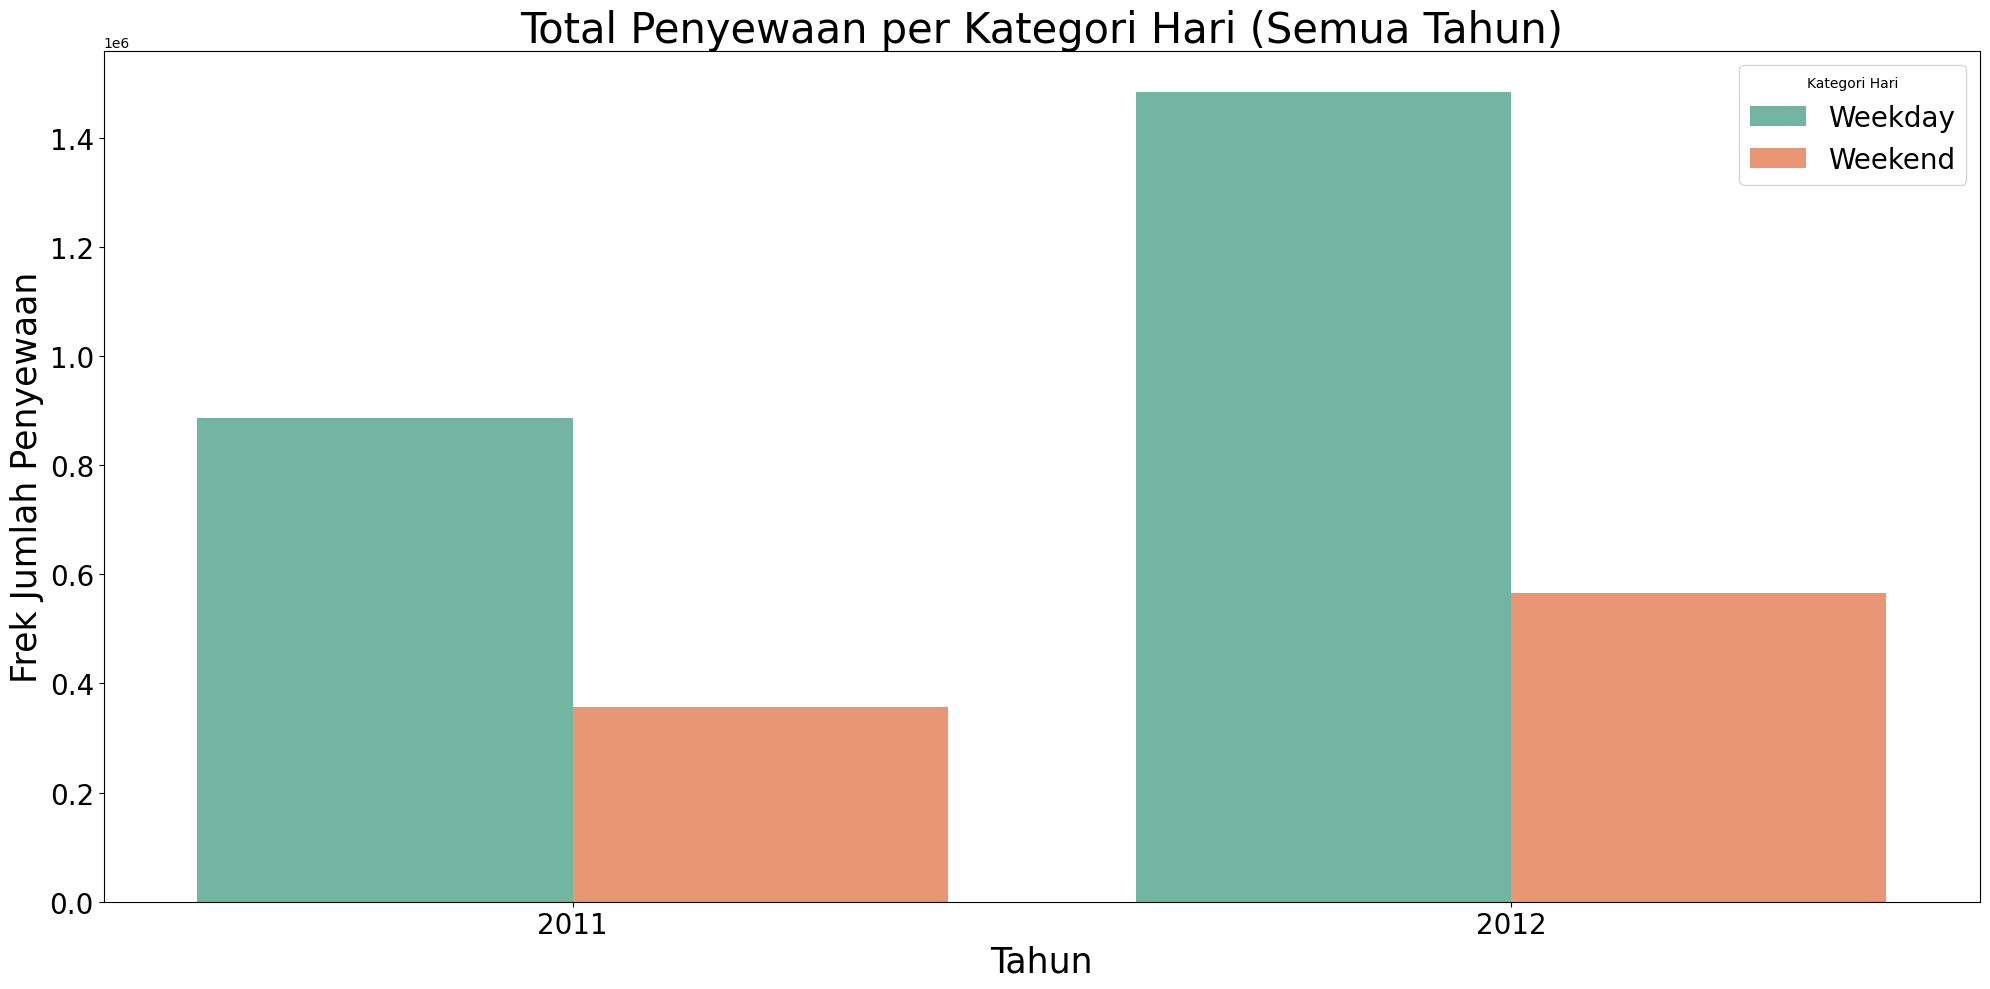

In [3738]:
# Menghitung jumlah penyewaan per category_day dan per tahun
agg_data = day_df.groupby(by=['category_day', 'year']).agg({
    'count_rental': 'sum'
}).reset_index()

# Membuat plot
plt.figure(figsize=(20, 10))

# Menggunakan seaborn barplot untuk semua tahun
sns.barplot(
    x='year', 
    y='count_rental', 
    data=agg_data,
    hue='category_day',
    palette='Set2',  # Menggunakan palette yang berbeda untuk tahun
)

# Mengatur judul dan label
plt.title('Total Penyewaan per Kategori Hari (Semua Tahun)', fontsize=30)
plt.ylabel('Frek Jumlah Penyewaan', fontsize=25)
plt.xlabel('Tahun', fontsize=25)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

# Menampilkan plot
plt.legend(title='Kategori Hari', fontsize=20)
plt.tight_layout()
plt.show()


Berdasarkan gambar di atas, <b>Weekday</b> atau hari kerja adalah hari yang sangat populer untuk menyewa sepeda dibandingkan dengan <b>Weekend</b> dari tahun ke tahun.

#### Pertanyaan 4: <b>Seberapa banyak penyewa yang memilih registered dibandingkan dengan casual?</b>

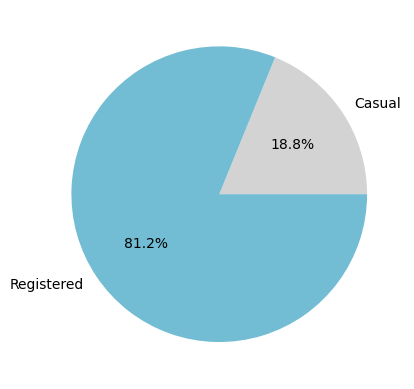

In [3739]:
colors = ['#D3D3D3', '#72BCD4']

total_casual = sum(day_df['casual'])
total_registered = sum(day_df['registered'])

data = [total_casual, total_registered]
labels = ['Casual', 'Registered']

plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%')
plt.show()

Pada gambar di atas, kita mengetahui bahwa <b>81.2%</b> penyewa telah <b>Registered</b> dan <b>18.8%</b> lannya <b>Casual.</b>

## <b>Conclusion</b>

Pertanyaan:
- Bagaimana musim dan cuaca dapat mempengaruhi penyewaan sepeda?
- Bagaimana tren permintaan penyewaan dari tahun ke tahun?
- Bagaimana penyewaan sepeda pada hari libur dibandingkan dengan hari kerja dari tahun ke tahun?
- Seberapa banyak penyewa yang memilih registered dibandingkan dengan casual?

Jawaban:
- Conclution pertanyaan 1:<br>
Musim dan cuaca sangat mempengaruhi jumlah penyewaan sepeda. Setelah melihat gambar di visualization, kita dapat mengetahui bahwa penyewaan paling banyak terjadi pada musim <b>Fall</b> (musim gugur) dan dicuaca yang <b>Clear</b> atau cerah.<br><br>
- Conclution pertanyaan 2:<br>
Setelah melihat gambar di visualization penyewaan sepeda setiap tahun mengalami peningkatan. Peningkatan penyewaan paling banyak pada <b>tahun 2012</b> di bulan <b>September</b>.<br>
<b>Tahun 2012</b><br>
Bisa dilihat bahwa peningkatan signifikan terlihat pada bulan-bulan awal <b>tahun 2012</b>, dengan lonjakan besar dari bulan <b>Februari</b> hingga <b>April</b>. Setelah itu, jumlah penyewaan stabil hingga <b>Agustus</b>, sebelum menurun secara bertahap mulai dari <b>September</b> hingga <b>Desember</b>.<br><br>
<b>Tahun 2011</b><br>
Di <b>tahun 2011</b>, jumlah penyewaan meningkat tajam pada bulan <b>Maret</b>, tetapi setelah itu mengalami sedikit peningkatan yang bertahap dari <b>Maret</b> hingga <b>Mei</b>.
Setelah bulan <b>Mei</b>, tren penyewaan untuk <b>tahun 2011</b> relatif stabil hingga <b>Desember</b> dengan hanya sedikit penurunan.<br><br>
- Conclution pertanyaan 3:<br>
Berdasarkan gambar di visualization, <b>Weekday</b> atau hari kerja adalah hari yang sangat populer untuk menyewa sepeda dibandingkan dengan <b>Weekend</b> dari tahun ke tahun.<br><br>
- Conclution pertanyaan 4:<br>
Pada gambar di visualization, kita mengetahui bahwa <b>81.2%</b> penyewa telah <b>Registered</b> dan <b>18.8%</b> lannya <b>Casual.</b>


## <b><i>"Menyimpan Semua Berkas Data yang Telah Dibersihkan"</i></b>

In [3740]:
day_df.to_csv("dashboard/day_data_clean.csv", index=False)
hour_df.to_csv("dashboard/hour_data_clean.csv", index=False)